In [17]:
from time import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

from keras.callbacks import TensorBoard

from keras.datasets import imdb

import keras.backend as K
from tensorflow.python import debug as tf_debug

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import os

In [10]:
sess = K.get_session()
sess = tf_debug.LocalCLIDebugWrapperSession(sess)
K.set_session(sess)

In [10]:
max_features = 20000
maxlen = 80
batch_size = 32

print(os.getcwd())

tensorboard = TensorBoard(log_dir="tf_logs/{}".format(time()))

/notebooks/test_scripts


In [11]:
#from keras.datasets import cifar10
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

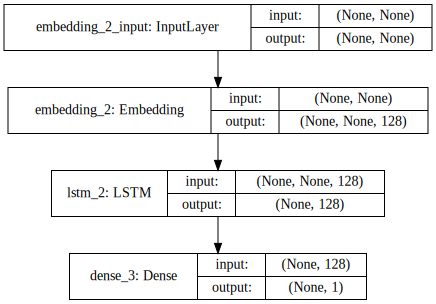

In [16]:
#plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [8]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test), verbose=1, callbacks=[tensorboard]) 

In [8]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 232s 9ms/step - loss: 0.4736 - acc: 0.7737 - val_loss: 0.4615 - val_acc: 0.7850
Epoch 2/15
20224/25000 [=======================>......] - ETA: 44s - loss: 0.3030 - acc: 0.8778

KeyboardInterrupt: 